In [61]:
import sqlite3
import pandas as pd

# Create Artifical Database
conn = sqlite3.connect('../guest_loyalty.db')
cursor = conn.cursor()

# Drop tables if they already exist
cursor.execute("DROP TABLE IF EXISTS guests;")
cursor.execute("DROP TABLE IF EXISTS transactions;")

# Create tables
cursor.execute('''
        CREATE TABLE guests ( 
              guest_id INTEGER PRIMARY KEY,
               name TEXT,
               email TEXT,
               loyalty_status TEXT
            );
               ''')
cursor.execute('''
        CREATE TABLE transactions (
               transaction_id INTEGER PRIMARY KEY,
               guest_id INTEGER,
               amount REAL,
              transaction_date TEXT,
               FOREIGN KEY(guest_id) REFERENCES guests(guest_id)
            );
               ''')
#Sample Guest Data 
cursor.executemany('''
        INSERT INTO guests (name, email, loyalty_status) VALUES(?, ?, ?); 
        ''', [
            ("Ava Johnsn", "ava@example.com", "Gold"),
            ("Noah Smith", "noah@example.com", "Silver"),
            ("Liam Brown", "liam@example.com","Platinum"),
            ("Emma Davis", "emma@example.com", "Bronze")
        ])
#Sample transactions
cursor.executemany('''
INSERT INTO transactions (guest_id, amount, transaction_date) VALUES (?, ?, ?);
''', [
    (1, 150.25, "2024-01-10"),
    (1, 220.50, "2024-02-15"),
    (2, 80.75, "2024-02-20"),
    (3, 300.00, "2024-03-05"),
    (4, 50.00, "2024-04-01"),
    (3, 200.00, "2024-04-15"),
    (1,120.00, "2024-05-01")
])

conn.commit()
conn.close()
print("Sample data created")

Sample data created


In [62]:
import sqlite3
import pandas as pd

#Reconnect to the database

conn = sqlite3.connect('../guest_loyalty.db')

#SQL query to join guests and transactions
query = '''
SELECT
    g.guest_id,
    g.name,
    g.loyalty_status,
    t.amount,
    t.transaction_date
FROM guests g
JOIN transactions t ON g.guest_id = t.guest_id;
'''
#Using pandas to read SQL query results
df = pd.read_sql_query(query, conn)
df
#Show first few rows of the dataframe
df.head()




,guest_id,name,loyalty_status,amount,transaction_date
0,1,Ava Johnsn,Gold,150.25,2024-01-10
1,1,Ava Johnsn,Gold,220.50,2024-02-15
2,2,Noah Smith,Silver,80.75,2024-02-20
3,3,Liam Brown,Platinum,300.00,2024-03-05
4,4,Emma Davis,Bronze,50.00,2024-04-01


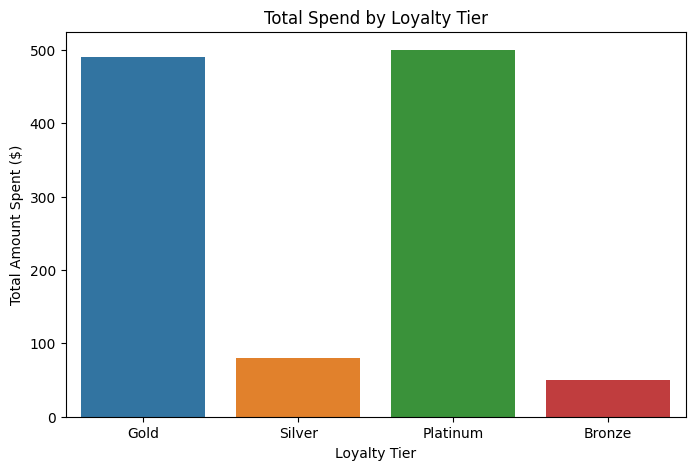

In [ ]:
# Total Spend by Loyalty Tier
plt.figure(figsize=(8,5)) #Set figure size
sns.barplot(data=df, x='loyalty_status', y='amount', estimator=sum, errorbar=None,hue='loyalty_status')
plt.title("Total Spend by Loyalty Tier") #Set title
plt.xlabel("Loyalty Tier") #Label x-axis
plt.ylabel("Total Amount Spent ($)") #Label y-axis
plt.show() #Display plot

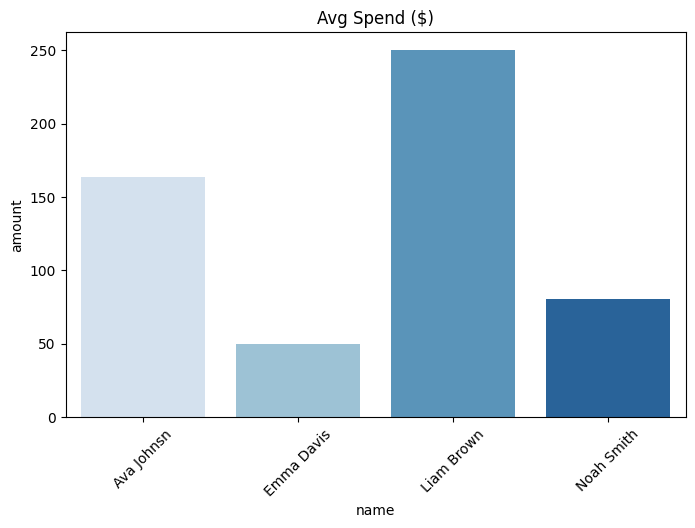

In [ ]:
#Calculate Average Spend per Guest

avg_spend = df.groupby('name')['amount'].mean().reset_index()

#Barplot of Average Spend per Guest
plt.figure(figsize=(8,5)) #set fig size
sns.barplot(data=avg_spend, x= 'name', y='amount',hue= 'name', palette='Blues', legend=False)
plt.title("Avg Spend ($)") #Label y-axis
plt.xticks(rotation=45) #Rotate for readability
plt.show()

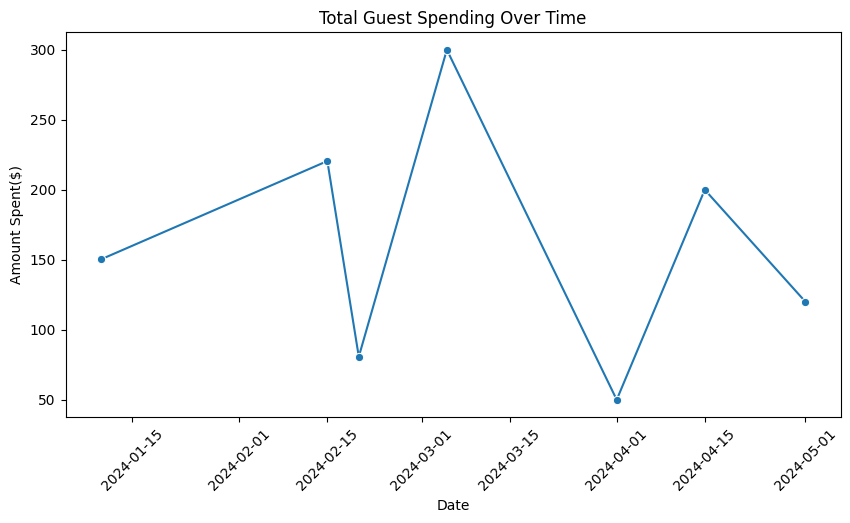

In [65]:
#Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

#Group by date to get total daily spending 
daily_spending = df.groupby('transaction_date')['amount'].sum().reset_index()

#Lineplot for Spending Over Time 
plt.figure(figsize=(10,5)) #Set figure size
sns.lineplot(data=daily_spending, x='transaction_date', y='amount', marker='o') #Plot data
plt.title("Total Guest Spending Over Time") #Set Title
plt.ylabel("Amount Spent($)") #Label y-axis
plt.xlabel("Date") #Label x-axis
plt.xticks(rotation=45) #Rotate x-axis for readability
plt.show() #Display plot